In [1]:
alias pip=pip3

ValueError: not enough values to unpack (expected 2, got 1)

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import metrics
import matplotlib.style
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")
%matplotlib inline

In [2]:
df=pd.read_excel("GCTD_Classification.xlsx")

In [3]:
gctd_df=df.copy()

In [4]:
gctd_df.shape

(42110, 29)

In [5]:
gctd_df.drop(columns=["call_term_party","call_term_reason","call_notes","connected_extern_id","dial_type","source_description",'connect_id','connected_name','recording_url','connected_route','call_start_dts','call_end_dts'],axis=1,inplace=True)

In [6]:
gctd_df.isnull().sum()

UII                         0
source_type                 0
source_group_id          1181
source_group_name        1181
source_id                1181
source_name              1181
ANI                       544
DNIS                        0
call_status                 0
call_result                 0
queue_time                106
call_duration               0
connected_dts             106
connected_duration       6977
connected_disposition    8517
connected_term_party     1498
connected_term_reason    7081
dtype: int64

In [7]:
gctd_df['source_group_id'].fillna(1111,inplace= True)
gctd_df['source_group_name'].fillna('Manual_outbound_group',inplace= True)
gctd_df['source_id'].fillna(2222,inplace= True)
gctd_df['source_name'].fillna('Manual_outbound_source',inplace= True)

In [8]:
gctd_df['connected_term_reason']=np.where(((gctd_df['connected_term_party']=='ABANDON')&(gctd_df['connected_term_reason'].isnull()==True)),'Not_Connected',gctd_df['connected_term_reason'])

In [9]:
gctd_df['connected_term_reason']=np.where(((gctd_df['connected_term_party']=='DEFLECTED')&(gctd_df['connected_term_reason'].isnull()==True)),'Not_Connected',gctd_df['connected_term_reason'])

In [10]:
gctd_df['connected_disposition'].fillna('Disconnected',inplace= True)

In [11]:
gctd_df['connected_duration'].fillna(0,inplace= True)

In [12]:
gctd_df.isnull().sum()

UII                         0
source_type                 0
source_group_id             0
source_group_name           0
source_id                   0
source_name                 0
ANI                       544
DNIS                        0
call_status                 0
call_result                 0
queue_time                106
call_duration               0
connected_dts             106
connected_duration          0
connected_disposition       0
connected_term_party     1498
connected_term_reason     104
dtype: int64

In [13]:
gctd_df.dropna(inplace= True)

In [14]:
gctd_df.isnull().sum()

UII                      0
source_type              0
source_group_id          0
source_group_name        0
source_id                0
source_name              0
ANI                      0
DNIS                     0
call_status              0
call_result              0
queue_time               0
call_duration            0
connected_dts            0
connected_duration       0
connected_disposition    0
connected_term_party     0
connected_term_reason    0
dtype: int64

In [15]:
gctd_df.drop_duplicates(inplace= True)

In [16]:
gctd_df.duplicated().sum()

0

In [17]:
gctd_df.drop(columns=['UII'],axis=1,inplace=True)

In [18]:
gctd_df.dropna().shape

(39755, 16)

In [19]:
gctd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39755 entries, 0 to 42109
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   source_type            39755 non-null  object        
 1   source_group_id        39755 non-null  float64       
 2   source_group_name      39755 non-null  object        
 3   source_id              39755 non-null  float64       
 4   source_name            39755 non-null  object        
 5   ANI                    39755 non-null  float64       
 6   DNIS                   39755 non-null  int64         
 7   call_status            39755 non-null  object        
 8   call_result            39755 non-null  object        
 9   queue_time             39755 non-null  float64       
 10  call_duration          39755 non-null  int64         
 11  connected_dts          39755 non-null  datetime64[ns]
 12  connected_duration     39755 non-null  float64       
 13  c

In [20]:
gctd_df.head(10)

,source_type,source_group_id,source_group_name,source_id,source_name,ANI,DNIS,call_status,call_result,queue_time,call_duration,connected_dts,connected_duration,connected_disposition,connected_term_party,connected_term_reason
0,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,2.033948e+09,8004222770,QUEUED,ABANDON,2.0,36,2021-08-01 00:10:20,0.0,Disconnected,ABANDON,Not_Connected
1,IVR-STUDIO-INBOUND,1354.0,Sundance Holdings IVR (Production),3233.0,Sundance Inbound v1.0 (went live 9-15-2020),3.103285e+09,8004222770,INTERNAL-APP-HANDOFF,IVR,32.0,33,2021-08-01 00:17:46,0.0,Disconnected,DEFLECTED,Not_Connected
2,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,2.036440e+09,8004222770,END-CALL-VM,DEFLECTED,3.0,42,2021-08-01 00:35:41,0.0,Disconnected,DEFLECTED,Not_Connected
3,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,8.178293e+09,8004222770,QUEUED,ABANDON,2.0,36,2021-08-01 00:46:21,0.0,Disconnected,ABANDON,Not_Connected
4,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,2.143847e+09,8004222770,QUEUED,ABANDON,1.0,35,2021-08-01 00:48:09,0.0,Disconnected,ABANDON,Not_Connected
5,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,8.164422e+09,8004222770,QUEUED,ABANDON,2.0,35,2021-08-01 01:21:33,0.0,Disconnected,ABANDON,Not_Connected
6,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,3.107384e+09,8004222770,END-CALL-VM,DEFLECTED,3.0,38,2021-08-01 01:33:14,0.0,Disconnected,DEFLECTED,Not_Connected
7,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,9.494674e+09,8004222770,END-CALL-VM,DEFLECTED,3.0,95,2021-08-01 01:52:56,0.0,Disconnected,DEFLECTED,Not_Connected
8,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,9.494674e+09,8004222770,END-CALL-VM,DEFLECTED,3.0,116,2021-08-01 01:54:37,0.0,Disconnected,DEFLECTED,Not_Connected
9,ACD-INBOUND,52847.0,Voicemail Groups,73946.0,officeClosed,5.755824e+09,8004222770,DEQUEUING-PHASE1,ABANDON,3.0,36,2021-08-01 02:11:24,0.0,Disconnected,ABANDON,Not_Connected


In [21]:
gctd_df.describe()


,source_group_id,source_id,ANI,DNIS,queue_time,call_duration,connected_duration
count,39755.000000,39755.000000,3.975500e+04,3.975500e+04,39755.000000,39755.000000,39755.000000
mean,47621.011043,66599.844875,5.918784e+09,8.004138e+09,118.986115,406.767350,267.975827
std,15491.316591,21280.255960,2.341271e+09,1.965917e+07,209.200012,370.936188,302.328828
min,1111.000000,2222.000000,1.151300e+04,4.084716e+09,0.000000,1.000000,0.000000
25%,52799.000000,73664.000000,4.056794e+09,8.004223e+09,10.000000,167.000000,82.000000
50%,52799.000000,73664.000000,6.083347e+09,8.004223e+09,26.000000,315.000000,198.000000
75%,52799.000000,73683.000000,8.048257e+09,8.004223e+09,128.000000,536.000000,359.000000
max,52847.000000,78344.000000,9.999562e+09,8.009687e+09,3496.000000,5818.000000,5796.000000


In [22]:
for cols in gctd_df.select_dtypes(include=['object']).columns:
        print(cols, " : ", gctd_df[cols].nunique())
        print(gctd_df[cols].value_counts().sort_values(ascending=False))
        print('\n')
        print(gctd_df[cols].value_counts(normalize=True).sort_values(ascending=False))
        print('\n')

source_type  :  4
ACD-INBOUND           35758
IVR-STUDIO-INBOUND     2892
MANUAL OUTBOUND        1080
CLOUD-INBOUND            25
Name: source_type, dtype: int64


ACD-INBOUND           0.899459
IVR-STUDIO-INBOUND    0.072746
MANUAL OUTBOUND       0.027166
CLOUD-INBOUND         0.000629
Name: source_type, dtype: float64


source_group_name  :  5
Sundance Call Queue Groups            34860
Sundance Holdings IVR (Production)     2892
Manual_outbound_group                  1080
Voicemail Groups                        898
Routing Calls                            25
Name: source_group_name, dtype: int64


Sundance Call Queue Groups            0.876871
Sundance Holdings IVR (Production)    0.072746
Manual_outbound_group                 0.027166
Voicemail Groups                      0.022588
Routing Calls                         0.000629
Name: source_group_name, dtype: float64


source_name  :  10
Queue [ Customer Service ]                                                     21232
Queue [ Ord

## Univariate analysis

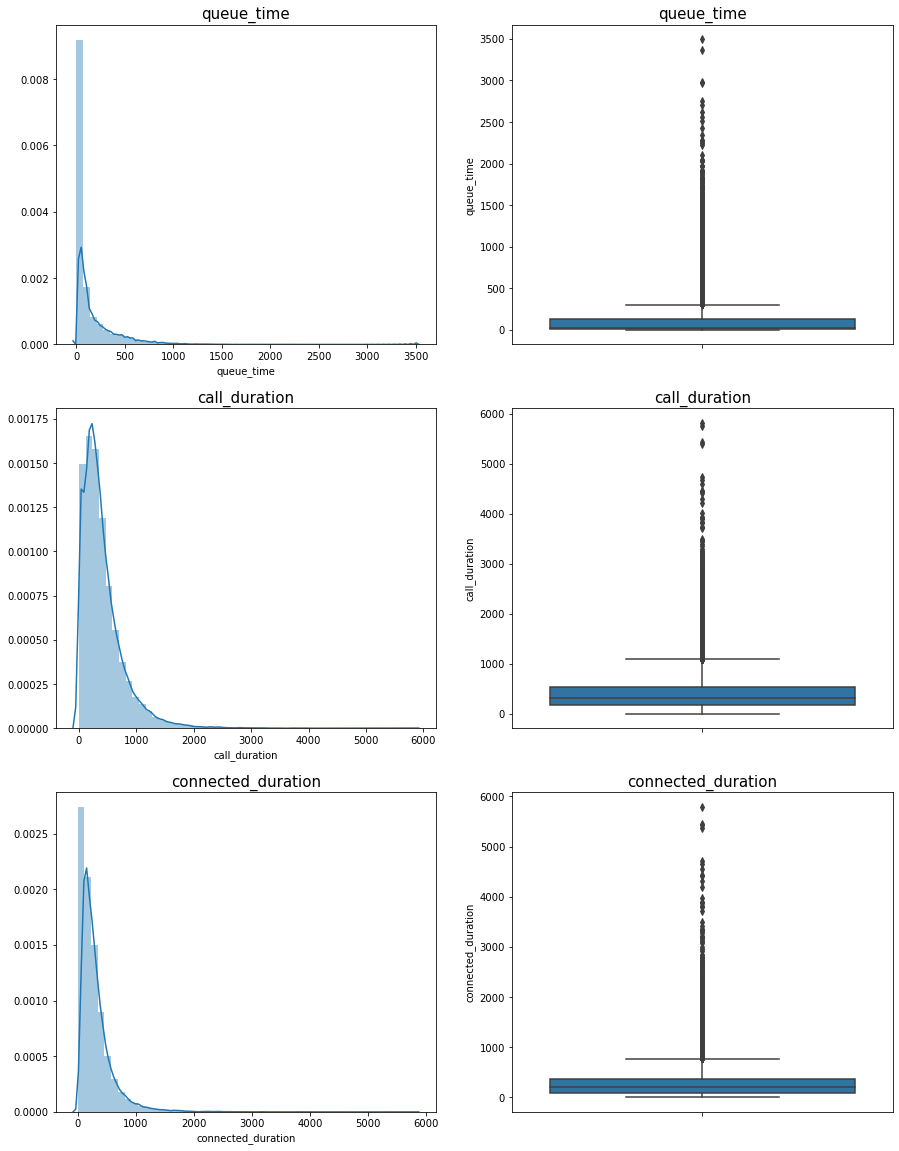

In [23]:
#univariate analysis   
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(gctd_df['queue_time'] , ax=axes[0][0])
a.set_title("queue_time",fontsize=15)
a = sns.boxplot(gctd_df['queue_time'] , orient = "v" , ax=axes[0][1])
a.set_title("queue_time",fontsize=15)

a = sns.distplot(gctd_df['call_duration'] , ax=axes[1][0])
a.set_title("call_duration",fontsize=15)
a = sns.boxplot(gctd_df['call_duration'] , orient = "v" , ax=axes[1][1])
a.set_title("call_duration",fontsize=15)

a = sns.distplot(gctd_df['connected_duration'] , ax=axes[2][0])
a.set_title("connected_duration",fontsize=15)
a = sns.boxplot(gctd_df['connected_duration'] , orient = "v" , ax=axes[2][1])
a.set_title("connected_duration",fontsize=15)
plt.show()

### Univariate analysis of categorical variables

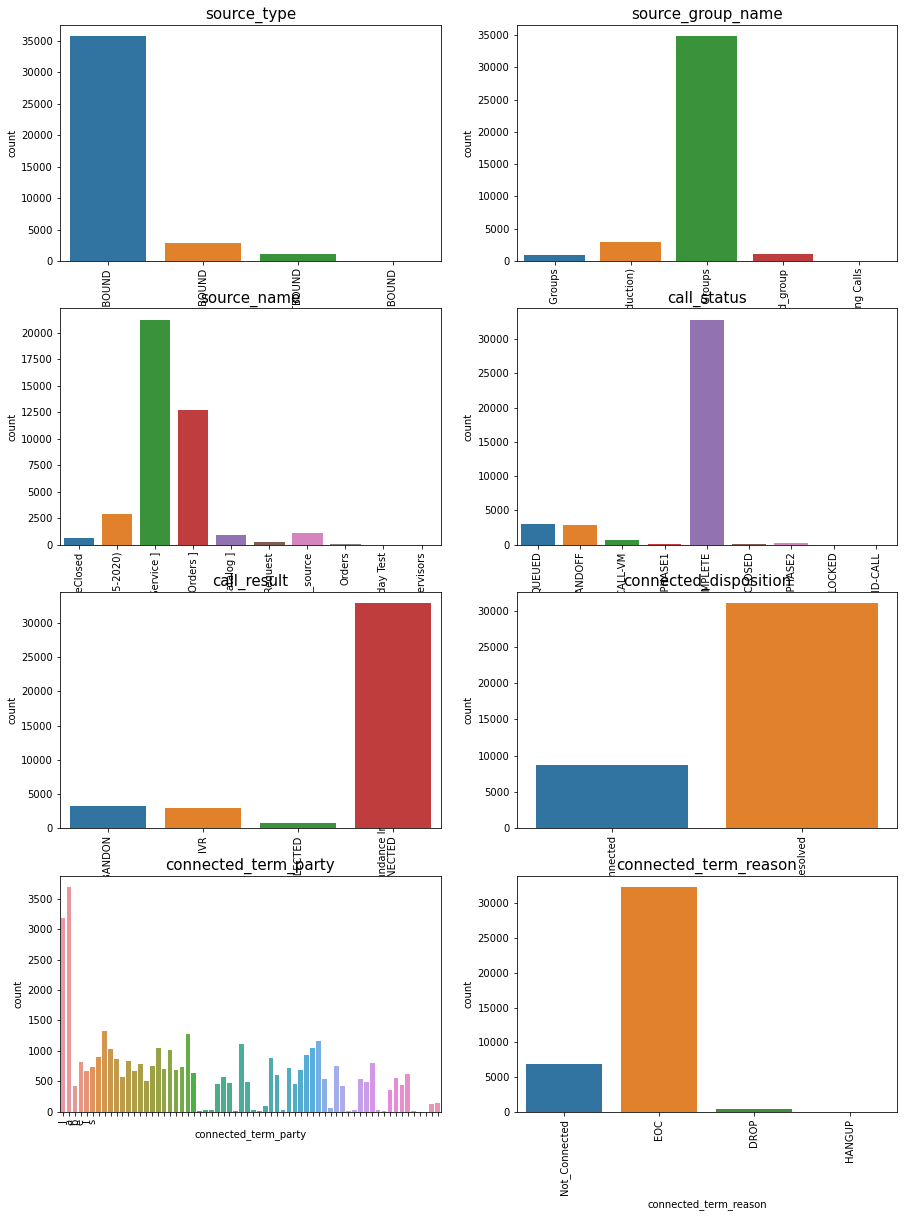

In [24]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.countplot(gctd_df['source_type'] , ax=axes[0][0])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("source_type",fontsize=15)

a = sns.countplot(gctd_df['source_group_name'] , ax=axes[0][1])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("source_group_name",fontsize=15)

a = sns.countplot(gctd_df['source_name'] , ax=axes[1][0])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("source_name",fontsize=15)

a = sns.countplot(gctd_df['call_status']  , ax=axes[1][1])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("call_status",fontsize=15)

a = sns.countplot(gctd_df['call_result'] , ax=axes[2][0])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("call_result",fontsize=15)

a = sns.countplot(gctd_df['connected_disposition'] ,  ax=axes[2][1])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("connected_disposition",fontsize=15)

a = sns.countplot(gctd_df['connected_term_party'] , ax=axes[3][0])
a.set_xticklabels('labels',rotation=90);
a.set_title("connected_term_party",fontsize=15)

a = sns.countplot(gctd_df['connected_term_reason'] ,ax=axes[3][1])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("connected_term_reason",fontsize=15)

plt.show()

## Bivariate

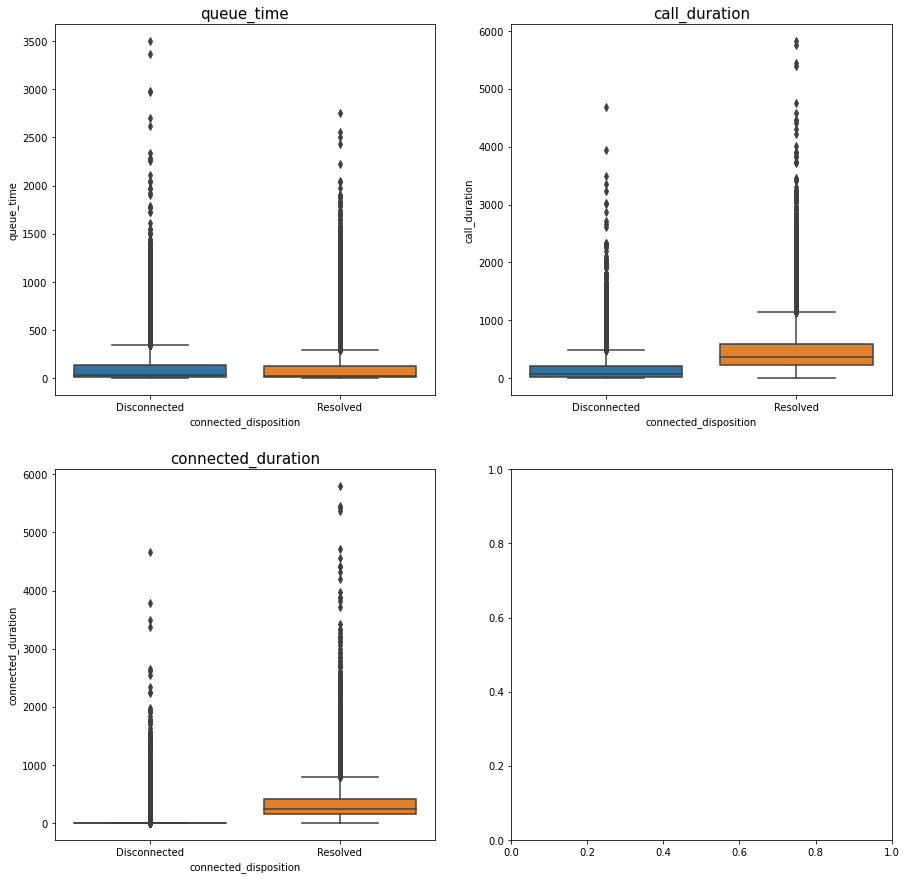

In [25]:
# continuous  
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,15)

a = sns.boxplot(gctd_df['connected_disposition'],gctd_df['queue_time'] , ax=axes[0][0])
a.set_title("queue_time",fontsize=15)


a = sns.boxplot(gctd_df['connected_disposition'],gctd_df['call_duration']  , ax=axes[0][1])
a.set_title("call_duration",fontsize=15)


a = sns.boxplot(gctd_df['connected_disposition'],gctd_df['connected_duration'] , ax=axes[1][0])
a.set_title("connected_duration",fontsize=15)
plt.show()

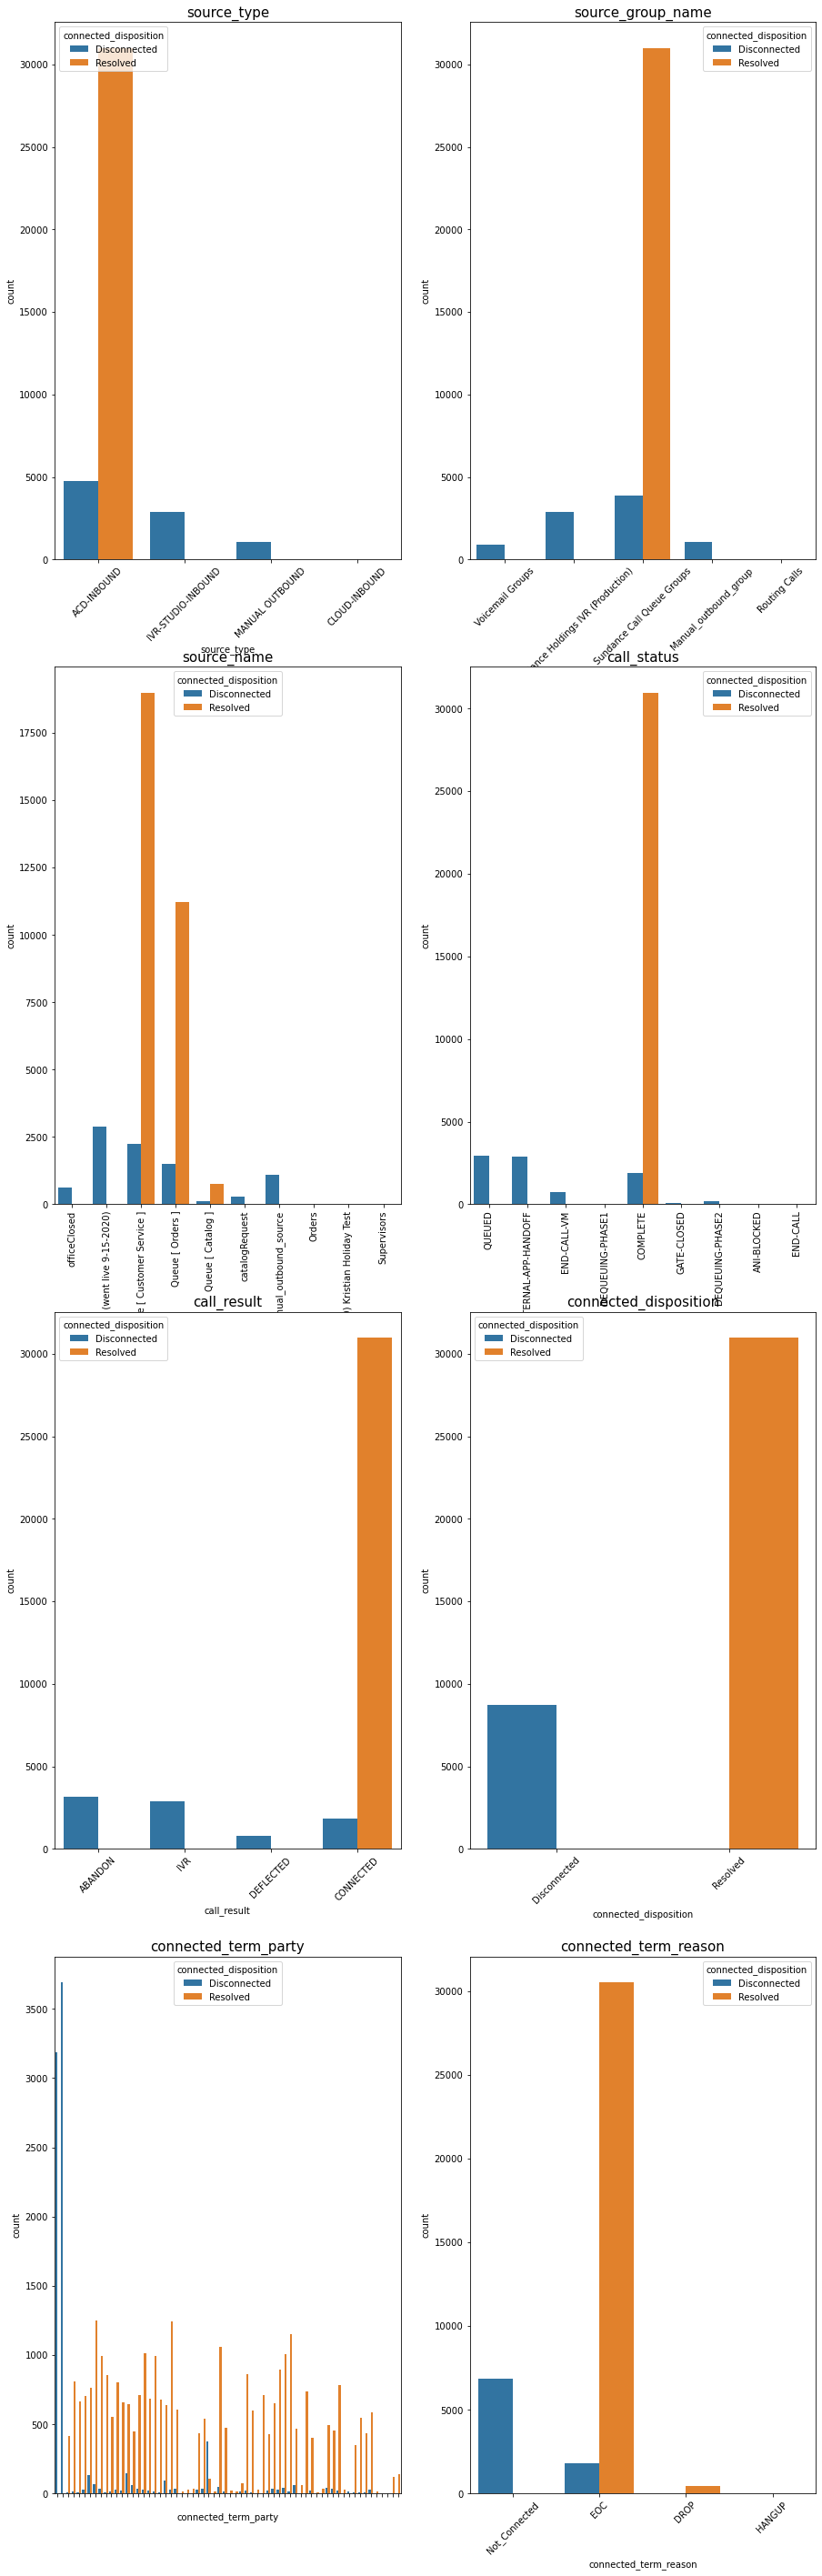

In [26]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,50)
a = sns.countplot(gctd_df['source_type'] ,hue=gctd_df['connected_disposition'], ax=axes[0][0])
a.set_xticklabels(a.get_xticklabels(),rotation=45);
a.set_title("source_type",fontsize=15)

a = sns.countplot(gctd_df['source_group_name'] ,hue=gctd_df['connected_disposition'], ax=axes[0][1])
a.set_xticklabels(a.get_xticklabels(),rotation=45);
a.set_title("source_group_name",fontsize=15)

a = sns.countplot(gctd_df['source_name'],hue=gctd_df['connected_disposition'] , ax=axes[1][0])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("source_name",fontsize=15)

a = sns.countplot(gctd_df['call_status'],hue=gctd_df['connected_disposition']  , ax=axes[1][1])
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set_title("call_status",fontsize=15)

a = sns.countplot(gctd_df['call_result'] ,hue=gctd_df['connected_disposition'], ax=axes[2][0])
a.set_xticklabels(a.get_xticklabels(),rotation=45);
a.set_title("call_result",fontsize=15)

a = sns.countplot(gctd_df['connected_disposition'] ,hue=gctd_df['connected_disposition'],  ax=axes[2][1])
a.set_xticklabels(a.get_xticklabels(),rotation=45);
a.set_title("connected_disposition",fontsize=15)

a = sns.countplot(gctd_df['connected_term_party'] ,hue=gctd_df['connected_disposition'], ax=axes[3][0])
a.set_xticklabels(' ',rotation=45);
a.set_title("connected_term_party",fontsize=15)

a = sns.countplot(gctd_df['connected_term_reason'],hue=gctd_df['connected_disposition'] ,ax=axes[3][1])
a.set_xticklabels(a.get_xticklabels(),rotation=45);
a.set_title("connected_term_reason",fontsize=15)

plt.show()

## Label Encoding

In [42]:
encoded_df=gctd_df.copy()

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Model Building

In [44]:
M_building_df=encoded_df.copy()

In [55]:
M_building_df.drop(columns=["connected_dts"],axis=1,inplace=True)

In [56]:
M_building_df

,source_type,source_group_id,source_group_name,source_id,source_name,ANI,DNIS,call_status,call_result,queue_time,call_duration,connected_duration,connected_disposition,connected_term_party,connected_term_reason
0,0,52847.0,4,73946.0,9,2.033948e+09,8004222770,8,0,2.0,36,0.0,0,0,3
1,2,1354.0,3,3233.0,6,3.103285e+09,8004222770,7,3,32.0,33,0.0,0,10,3
2,0,52847.0,4,73946.0,9,2.036440e+09,8004222770,5,2,3.0,42,0.0,0,10,3
3,0,52847.0,4,73946.0,9,8.178293e+09,8004222770,8,0,2.0,36,0.0,0,0,3
4,0,52847.0,4,73946.0,9,2.143847e+09,8004222770,8,0,1.0,35,0.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42105,0,52799.0,2,73683.0,5,9.187664e+09,8004222770,1,1,240.0,445,190.0,1,56,1
42106,0,52799.0,2,73683.0,5,8.624855e+09,8004222770,1,1,54.0,638,571.0,1,62,1
42107,0,52799.0,2,73683.0,5,2.403501e+09,8004222770,1,1,55.0,513,445.0,1,28,1
42108,0,52799.0,2,73683.0,5,6.617032e+09,8004222770,1,1,172.0,350,163.0,1,45,1


In [57]:
M_building_df['connected_disposition'].value_counts(normalize=True)

1    0.780003
0    0.219997
Name: connected_disposition, dtype: float64

In [58]:
X = M_building_df.drop("connected_disposition", axis=1)

y = M_building_df[['connected_disposition']]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [60]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (27828, 14)
X_test (11927, 14)
train_labels (27828, 1)
test_labels (11927, 1)


In [61]:
y_test['connected_disposition'].value_counts(normalize=True)

1    0.784439
0    0.215561
Name: connected_disposition, dtype: float64

In [62]:
X_train_copy=X_train.copy()

## 1.Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [64]:
model_logR = LogisticRegression(random_state=1)

In [65]:
model_logR.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [66]:
ytrain_predict_logR = model_logR.predict(X_train)
ytest_predict_logR = model_logR.predict(X_test)

In [67]:
print("Train Set Classification Report\n",classification_report(y_train, ytrain_predict_logR),'\n');
print("Test Set Classification Report\n",classification_report(y_test, ytest_predict_logR),'\n');

Train Set Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6175
           1       0.78      1.00      0.88     21653

    accuracy                           0.78     27828
   macro avg       0.39      0.50      0.44     27828
weighted avg       0.61      0.78      0.68     27828
 

Test Set Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2571
           1       0.78      1.00      0.88      9356

    accuracy                           0.78     11927
   macro avg       0.39      0.50      0.44     11927
weighted avg       0.62      0.78      0.69     11927
 



### LogR AUC ROC Confusion matrix for train data

AUC: 0.512


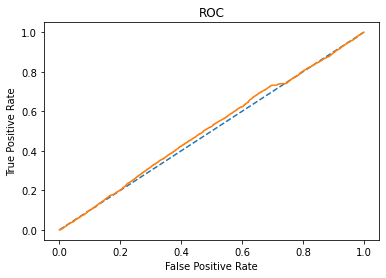

In [68]:
# predict probabilities
probs = model_logR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logR_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logR_train_auc)
# calculate roc curve
logR_train_fpr, logR_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(logR_train_fpr, logR_train_tpr);

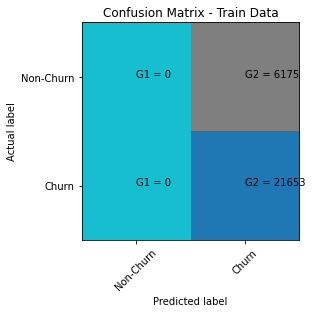

In [69]:
cm = metrics.confusion_matrix(y_train, ytrain_predict_logR)
plt.clf()
plt.imshow(cm, cmap=plt.cm.tab10_r)
classNames = ['Non-Churn', 'Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### LogR AUC ROC Confusion matrix for test data

AUC: 0.521


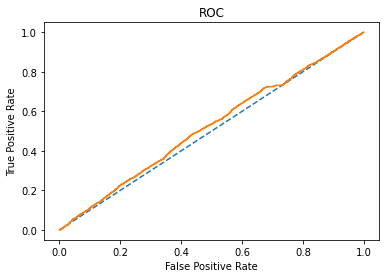

In [70]:
# predict probabilities
probs = model_logR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logR_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logR_test_auc)
# calculate roc curve
logR_test_fpr, logR_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(logR_test_fpr, logR_test_tpr);

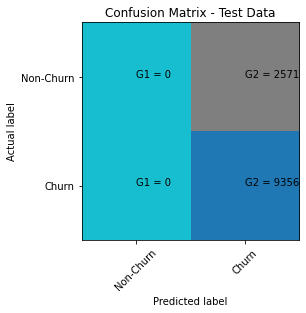

In [71]:
cm = metrics.confusion_matrix(y_test, ytest_predict_logR)
plt.clf()
plt.imshow(cm, cmap=plt.cm.tab10_r)
classNames = ['Non-Churn', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## 2. LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
#Build LDA Model
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [74]:
ytrain_predict_lda = model_lda.predict(X_train)
ytest_predict_lda = model_lda.predict(X_test)

In [75]:
print("Train Set Classification Report\n",classification_report(y_train, ytrain_predict_lda),'\n');
print("Test Set Classification Report\n",classification_report(y_test, ytest_predict_lda),'\n');

Train Set Classification Report
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      6175
           1       0.97      1.00      0.99     21653

    accuracy                           0.98     27828
   macro avg       0.99      0.95      0.97     27828
weighted avg       0.98      0.98      0.98     27828
 

Test Set Classification Report
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      2571
           1       0.98      1.00      0.99      9356

    accuracy                           0.98     11927
   macro avg       0.99      0.96      0.97     11927
weighted avg       0.98      0.98      0.98     11927
 

